In [1]:
from __future__ import print_function, division
#
import sys,os
os.environ['KMP_DUPLICATE_LIB_OK']='True' # uncomment this line if omp error occurs on OSX for python 3
os.environ['OMP_NUM_THREADS']='1' # set number of OpenMP threads to run in parallel
os.environ['MKL_NUM_THREADS']='1' # set number of MKL threads to run in parallel
#
quspin_path = os.path.join(os.getcwd(),"../../")
sys.path.insert(0,quspin_path)
#
from quspin.basis import spinful_fermion_basis_general
from quspin.operators import hamiltonian
import numpy as np
import networkx as nx # networkx package, see https://networkx.github.io/documentation/stable/
import matplotlib.pyplot as plt # plotting library

In [2]:
def plot_graph(graph):
    """
    A plotting utility
    """
    # visualise graph
    #pos = nx.spring_layout(graph, seed=42, iterations=100)
    nx.draw(graph, with_labels=True)#, pos=pos
    plt.show(block=False)    

In [3]:
def test_fermi_hubbad(graph):
    """
    Find lowert energies
    """
    
    # NOTE that in genral we need the following to label graph nodes by consecutive integers:
    # graph = nx.convert_node_labels_to_integers(graph)
    
    # set number of lattice sites
    N = graph.number_of_nodes()
    
    ##### model parameters
    #
    N_up = 2 # number of spin-up fermions
    N_down = 2 # number of spin-down fermions
    t = 1.0 # tunnelling matrix element
    U = 2.0 # on-site fermion interaction strength
    #
    ##### set up Fermi-Hubbard Hubbard Hamiltonian with quspin #####
    #
    ### compute basis
    basis = spinful_fermion_basis_general(N, Nf=(N_up, N_down))
    print('Hilbert space size: {0:d}.\n'.format(basis.Ns))
    #
    # define site-coupling lists

    ####################################################
    #
    # this is where you should put the graph of your choice
    #
    ####################################################

    tunnelling   = [[-t, i, j] for i in graph for j in graph.adj[i]]
    interactions = [[ U, i, i] for i in graph]
    #
    # define site-coupling lists [hermitian conjugates "-+|" and "|-+" contained in tunnelling list]
    static = [["n|n", interactions], ["+-|", tunnelling], ["|+-", tunnelling]]
    dynamic=[]
    #
    ### construct Hamiltonian
    H = hamiltonian(static, dynamic, basis=basis, dtype=np.float64)
    #
    # compute eigensystem
    E, V = H.eigsh(k=4,which='SA',maxiter=1E4)
    print(f'\nlowest energies: {E}')

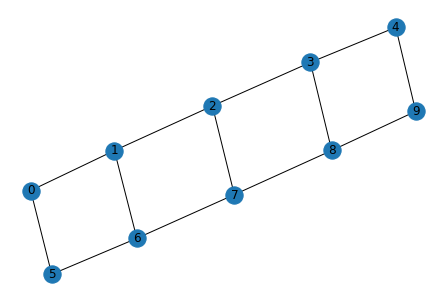

Hilbert space size: 2025.

Hermiticity check passed!
Symmetry checks passed!


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Test for particle conservation not implemented for <class 'quspin.basis.basis_general.fermion.spinful_fermion_basis_general'>, to turn off this warning set check_pcon=False in hamiltonian



lowest energies: [-8.83106536 -8.01282819 -7.78666661 -7.68877688]


In [4]:
# An example
graph1 = nx.ladder_graph(5)
plot_graph(graph1)
test_fermi_hubbad(graph1)

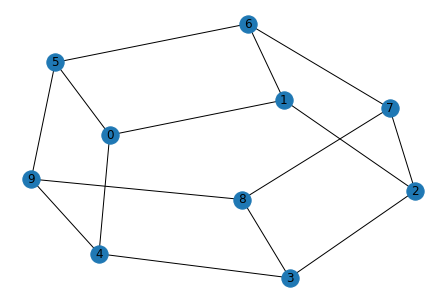

Hilbert space size: 2025.

Hermiticity check passed!
Symmetry checks passed!

lowest energies: [-8.76139073 -8.63199975 -8.63199975 -8.51263048]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Test for particle conservation not implemented for <class 'quspin.basis.basis_general.fermion.spinful_fermion_basis_general'>, to turn off this warning set check_pcon=False in hamiltonian


In [5]:
# An example
graph2 = nx.circular_ladder_graph(5)
plot_graph(graph2)
test_fermi_hubbad(graph2)

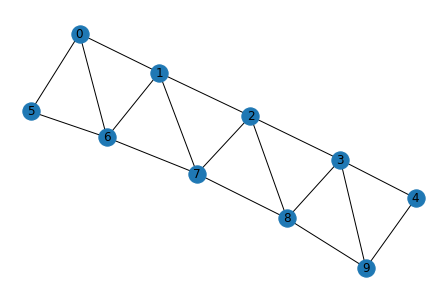

Hilbert space size: 2025.

Hermiticity check passed!
Symmetry checks passed!

lowest energies: [-11.87207535 -10.7290543  -10.46299288  -9.76479513]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Test for particle conservation not implemented for <class 'quspin.basis.basis_general.fermion.spinful_fermion_basis_general'>, to turn off this warning set check_pcon=False in hamiltonian


In [6]:
n = 5

graph3 = nx.ladder_graph(n)
graph3.add_edges_from([(j, j + n + 1) for j in range(n - 1)])

plot_graph(graph3)
test_fermi_hubbad(graph3)